# SC15. Ingeniería de Características

## L1. Lectura y escritura de archivos

In [1]:
import pandas as pd

data = {
    'metros_terreno': [200, 400, 120],
    'zona': ['A', 'B', 'C'],
    'cuartos': [3, 6, 3],
    'estacionamientos': [2, 3, 1],
    'precio': [1825000, 2850000, 1375000]
}

datos = pd.DataFrame(data)
datos

,metros_terreno,zona,cuartos,estacionamientos,precio
0,200,A,3,2,1825000
1,400,B,6,3,2850000
2,120,C,3,1,1375000


In [2]:
list(datos.columns)

['metros_terreno', 'zona', 'cuartos', 'estacionamientos', 'precio']

In [3]:
datos.dtypes

metros_terreno       int64
zona                object
cuartos              int64
estacionamientos     int64
precio               int64
dtype: object

Renombar columnas

In [4]:
datos.rename(columns={'cuartos':'numero_cuartos'})

#La instrucción anterior regresa un nuevo frame y si no se guarda se pierde, por eso es necesario asignarlo al frame original:
datos = datos.rename(columns = {'cuartos': 'numero_cuartos'})

# O bien, decirle que haga el cambio en el frame actual, de la siguiente forma:
datos.rename(columns={'cuartos':'numero_cuartos'}, inplace=True)

Cambiar un registro

In [5]:
datos.at[2,'numero_cuartos']=4
datos

#Esta instrucción sí lo hace en el mismo dataframe por lo que no hay necesidad de usar "inplace = True"

,metros_terreno,zona,numero_cuartos,estacionamientos,precio
0,200,A,3,2,1825000
1,400,B,6,3,2850000
2,120,C,4,1,1375000


## L2. Manejo y modificación de matrices y tablas

### Datos

In [6]:
data = {
    'nombre': ['Gran X', 'Colonial', 'The Bridge'],
    'ciudad': ['Cancun', 'Barranquilla', 'Portland'],
    'estado': ['Quintana Roo', 'Atlántico', 'Oregon'],
    'pais': ['México', 'Colombia', 'USA'],
    'habitación': ['doble', 'sencilla', 'sencilla'],
    'precio': [3250, 1500, 2500],
    'estrellas': [5, 4, 3],
    'playa': ['1', '0', '0']
}

hoteles = pd.DataFrame(data)
hoteles

,nombre,ciudad,estado,pais,habitación,precio,estrellas,playa
0,Gran X,Cancun,Quintana Roo,México,doble,3250,5,1
1,Colonial,Barranquilla,Atlántico,Colombia,sencilla,1500,4,0
2,The Bridge,Portland,Oregon,USA,sencilla,2500,3,0


### Selección y eliminación de columnas

#### Selección

##### Una columna

In [7]:
print(hoteles['pais'])

#También odemos usar los siguientes métodos: } ".columna"
print(hoteles.pais)

#O bien, la búsqueda por indexación con el método ".iloc[]", este método debe recibir dos valores, el renglón y la columna:
print(hoteles.iloc[:,3])

#De manera similar podemos encontrar la columna con su mismo índice de columna y llamarla dentro del dataframe:
print(hoteles[hoteles.columns[3]])

0      México
1    Colombia
2         USA
Name: pais, dtype: object
0      México
1    Colombia
2         USA
Name: pais, dtype: object
0      México
1    Colombia
2         USA
Name: pais, dtype: object
0      México
1    Colombia
2         USA
Name: pais, dtype: object


#### Varias columnas

Es importantes que consideres que la selección de varias columnas tiene dos variantes:
* Selección de columnas en diferentes lugares.
* Selección de columnas que se encuentran continuas.

Para seleccionar columnas de diferentes lugares, sólo debemos colocar el nombre del dataframe seguido
de una lista de columnas colocada entre corchetes.

In [8]:
hoteles[['nombre','precio', 'playa']]

,nombre,precio,playa
0,Gran X,3250,1
1,Colonial,1500,0
2,The Bridge,2500,0


Lo más importante de esta forma de seleccionar columnas es que las puedes poner en el orden que desees:

In [9]:
hoteles[['playa', 'precio', 'nombre']]

,playa,precio,nombre
0,1,3250,Gran X
1,0,1500,Colonial
2,0,2500,The Bridge


Nuevo DataFrame:

In [10]:
hotelPlaya = hoteles[['playa', 'precio', 'nombre']]
hotelPlaya

,playa,precio,nombre
0,1,3250,Gran X
1,0,1500,Colonial
2,0,2500,The Bridge


Usando *".iloc[]"* también es posible seleccionar columnas en diferente orden con sólo usar una lista:

In [11]:
hoteles.iloc[:,[7,5,0]]

,playa,precio,nombre
0,1,3250,Gran X
1,0,1500,Colonial
2,0,2500,The Bridge


##### Columnas conjuntas

Cuando queremos seleccionar columnas consecutivas, podemos usar *"slicing"* como en las matrices.

Si queremos seleccionar columnas consecutivas por su número, debemos usar *"iloc"*. <br>
Si queremoshacerlo con su nombre usamos *"loc"*.

In [12]:
#.iloc[] para seleccionar las columas de 1 a 5 (exclusivo)
hoteles.iloc[:,1:6]

,ciudad,estado,pais,habitación,precio
0,Cancun,Quintana Roo,México,doble,3250
1,Barranquilla,Atlántico,Colombia,sencilla,1500
2,Portland,Oregon,USA,sencilla,2500


In [13]:
#.loc[] para seleccionar las columnas de 'ciudad' a 'precio' (inclusivo)
hoteles.loc[:,'ciudad':'precio']

,ciudad,estado,pais,habitación,precio
0,Cancun,Quintana Roo,México,doble,3250
1,Barranquilla,Atlántico,Colombia,sencilla,1500
2,Portland,Oregon,USA,sencilla,2500


### Eliminación

Para eliminar una columna en pandas se utiliza la función *"drop"*. <br>
Ésta recibe como parámetro el nombre de la columna (o lista de columnas) que deseamos eliminar. <br>
También es necesario que uses el parámetro *axis=1*, para indicar que lo que se va a borrar es una columna.

In [14]:
nuevo_df = hoteles.drop('estrellas', axis=1)
nuevo_df

,nombre,ciudad,estado,pais,habitación,precio,playa
0,Gran X,Cancun,Quintana Roo,México,doble,3250,1
1,Colonial,Barranquilla,Atlántico,Colombia,sencilla,1500,0
2,The Bridge,Portland,Oregon,USA,sencilla,2500,0


El frame *hoteles* queda sin cambio, por eso lo tenemos que guardar en *nuevo_frame*. <br>
Si queremos que se guarde en el mismo frame *hoteles* hay dos formas:

In [ ]:
#Asignando el resultado a hoteles:
hoteles = hoteles.drop("estrellas", axis=1)
# Usando el parámetro inplace=True:
hoteles.drop("estrellas", axis=1, inplace=True)

Si se desean borrar varias columnas es necesario que se le pase una lista con los nombres de las columnas que se desean borrar, sin importar el orden.

In [16]:
nuevo_frame = hoteles.drop(['playa', 'precio'], axis=1)
nuevo_frame

,nombre,ciudad,estado,pais,habitación
0,Gran X,Cancun,Quintana Roo,México,doble
1,Colonial,Barranquilla,Atlántico,Colombia,sencilla
2,The Bridge,Portland,Oregon,USA,sencilla


Una alternativa es usar el parámetro *columns* seguido del nombre de la columna que se desea borrar. <br>
Este tiene la ventaja que ya no se requiere usar el parámetro *axis*.

In [ ]:
# Para una coluna
nuevo_frame = hoteles.drop(columns='precio')

# Para varias 
nuevo_frame = hoteles.drop(columns=['precio','estrellas'])

nuevo_frame

El método *drop* también nos sirve para eliminar renglones:

In [18]:
#Donde 1 es el número de renglón y axis=0 es el parámetro selector de renglones
hoteles.drop(1,axis=0)

,nombre,ciudad,estado,pais,habitación,precio,playa
0,Gran X,Cancun,Quintana Roo,México,doble,3250,1
2,The Bridge,Portland,Oregon,USA,sencilla,2500,0


In [19]:
#Para eliminar varios renglones pasamos una lita de los mismos en el primér parámetro
hoteles.drop([0,2],axis=0)

,nombre,ciudad,estado,pais,habitación,precio,playa
1,Colonial,Barranquilla,Atlántico,Colombia,sencilla,1500,0


### Cambio de nombres

In [20]:
#Para una o varias columnas, sólo debemos pasar un diccionario como parámetro dentreo de columns
hoteles.rename(columns={'estrellas':'NO_ESTRELLAS', 'precio':'PRECIO'})

,nombre,ciudad,estado,pais,habitación,PRECIO,playa
0,Gran X,Cancun,Quintana Roo,México,doble,3250,1
1,Colonial,Barranquilla,Atlántico,Colombia,sencilla,1500,0
2,The Bridge,Portland,Oregon,USA,sencilla,2500,0


### Adición de columnas a una tabla

### Pegar/Concatenar

La concatenación se puede hacer de dos formas:

* Por renglones: Se pegan los renglones de un frame a otro.
* Por columnas: Se pegan las columnas de un frame a otro. <br>

Para pegar dos frames por *renglones*, los renglones de uno de ellos se pegan en el otro. <br>
Para este caso, el *número de columnas de un frame debe coincidir con el número de columnas del otro.* <br>
Además, las columnas de un frame deben contener las mismas características que las del otro y en el mismo orden, para que al momento de hacer el pegado los datos tengan sentido. 

#### Columnas

In [21]:
data = {
    'Nombre':['Pailina', 'Norberto', 'Julia', 'Mario'],
    'Examen': [97,85,86,91],
    'Poryecto': [95,95,90,90]
}

grupoDS = pd.DataFrame(data=data)
grupoDS

,Nombre,Examen,Poryecto
0,Pailina,97,95
1,Norberto,85,95
2,Julia,86,90
3,Mario,91,90


In [22]:
data = {
    'Nombre':['Ricardo','Fernanda'],
    'Examen':[88,84],
    'Proyecto':[93,98]
}

otroGrupoDS = pd.DataFrame(data=data)
otroGrupoDS

,Nombre,Examen,Proyecto
0,Ricardo,88,93
1,Fernanda,84,98


La concatenación se hace con la instrucción concat de Pandas, que recibe como parámetro la lista que contiene los frame que se quieren concatenar y regresa como resultado un nuevo dataframe.

In [23]:
#La intrucción ignore_index=True nos asegura que el recuento del índice de nuestro dataframe
df = pd.concat([grupoDS,otroGrupoDS],ignore_index=True)
df

,Nombre,Examen,Poryecto,Proyecto
0,Pailina,97,95.0,NaN
1,Norberto,85,95.0,NaN
2,Julia,86,90.0,NaN
3,Mario,91,90.0,NaN
4,Ricardo,88,NaN,93.0
5,Fernanda,84,NaN,98.0


Si los dataframes contiene datos diferentes, la función *concat* hace la concatenación en las columnas coincidentes y coloca a los datos fatntes un indicador *NAN*

In [24]:
data = {
    'Nombre':['Victoria', 'Manuel'],
    'Edad':[23,24],
    'Examen':[78,72]
}

otroGrupoDSOtrosDatos = pd.DataFrame(data=data)
otroGrupoDSOtrosDatos

,Nombre,Edad,Examen
0,Victoria,23,78
1,Manuel,24,72


In [25]:
pd.concat([df,otroGrupoDSOtrosDatos], ignore_index=True)

,Nombre,Examen,Poryecto,Proyecto,Edad
0,Pailina,97,95.0,NaN,NaN
1,Norberto,85,95.0,NaN,NaN
2,Julia,86,90.0,NaN,NaN
3,Mario,91,90.0,NaN,NaN
4,Ricardo,88,NaN,93.0,NaN
5,Fernanda,84,NaN,98.0,NaN
6,Victoria,78,NaN,NaN,23.0
7,Manuel,72,NaN,NaN,24.0


##### NOTE: - *append* - Deprecated since version 1.4.0: Use *concat()* instead.

#### Renglones

In [26]:
data = {
    'Apellido':['Pérez', 'López', 'Hernandez', 'García'],
    'Edad':[23,26,25,24]
}

grupoDSMasDatos = pd.DataFrame(data=data)
grupoDSMasDatos

,Apellido,Edad
0,Pérez,23
1,López,26
2,Hernandez,25
3,García,24


In [27]:
pd.concat([grupoDS,grupoDSMasDatos], axis=1)

,Nombre,Examen,Poryecto,Apellido,Edad
0,Pailina,97,95,Pérez,23
1,Norberto,85,95,López,26
2,Julia,86,90,Hernandez,25
3,Mario,91,90,García,24


In [28]:
#En caso de querer concatenar solo algunas columnas:
pd.concat([grupoDS,grupoDSMasDatos['Apellido']], axis=1)

,Nombre,Examen,Poryecto,Apellido
0,Pailina,97,95,Pérez
1,Norberto,85,95,López
2,Julia,86,90,Hernandez
3,Mario,91,90,García


### Nueva

In [ ]:
#Asignación calculada
grupoDS['Final'] = (grupoDS['Examen']*0.5)+(grupoDS['Proyecto']*0.5)
grupoDS

In [32]:
#Asignación fija
grupoDS['Grupo'] = 1
grupoDS

,Nombre,Examen,Poryecto,Grupo
0,Pailina,97,95,1
1,Norberto,85,95,1
2,Julia,86,90,1
3,Mario,91,90,1


In [33]:
#Asignación determinada 
grupoDS['Apellido']=['Pérez', 'López', 'Hernández', 'García']
grupoDS

,Nombre,Examen,Poryecto,Grupo,Apellido
0,Pailina,97,95,1,Pérez
1,Norberto,85,95,1,López
2,Julia,86,90,1,Hernández
3,Mario,91,90,1,García


In [ ]:
#Ordfenamiento del dataframe 
grupoDS = grupoDS[['Nombre', 'Apellido', 'Grupo', 'Examen', 'Proyecto', 'Final']]
grupoDS

#### Métodos *insert* y *assign*

Existen dos métodos de los frames de Pandas que te permiten agregar una columna con valores: *insert* y *assign*.<br>
El método *assign* funciona igual que la asignación que vimos anteriormente y agrega la columna al final del frame. Por ejemplo, si a nuestro frame original *grupoDS* de cuatro alumnos, le queremos agregar la columna Apellido se hace de la siguiente forma:

In [ ]:
grupoDS.assign(Apellido = ['Pérez', 'López', 'Hernández', 'García'])

,Nombre,Apellido,Grupo,Examen,Proyecto,Final
0,Paulina,Pérez,1,97,95,96.0
1,Norberto,López,1,85,95,90.0
2,Julia,Hernández,1,86,90,88.0
3,Mario,García,1,91,90,90.5


El método *insert* tiene la ventaja que permite colocar una columna exactamente en el lugar que se requiera. 
Por ejemplo, si queremos agregar la columna *Apellido* a nuestro frame original *grupoDS*, pero inmediatamente después de la columna
*Nombre*, esto es, en el lugar *1*,porque recuerda que la numeración inicia en *0*, la instrucción es la siguiente:

In [ ]:
grupoDS.insert(1,"Apellidos",['Pérez', 'López', 'Hernández', 'García'])
grupoDS

,Nombre,Apellidos,Examen,Poryecto
0,Pailina,Pérez,97,95
1,Norberto,López,85,95
2,Julia,Hernández,86,90
3,Mario,García,91,90


## L3. Evaluación y Selección de Características

### Métodos de selección basados en correlación

#### Conjunto de datos
Comúnmente cuando el conjunto de datos sí tiene una variable de salida, la tarea que se busca hacer es predecir su valor basado en el resto de las variables denominadas variables de entrada, teniendo los siguientes casos: *Pronóstico, Categoría, Clasificación, Análisis descriptivo*

#### Correlación 
Se busca la correlación lineal positiva o negativa entre una variable de entrada y la variable de salida.

#### Variables redundantes
Se dice que dos variables son redundantes si el valor de una puede ser completamente explicado con la otra, es decir, si es la misma información la que está contenida completamente en ambas.

#### Relación con la salida​
Cuando existe una variable de salida es necesario llevar a cabo un tipo más de prueba para eliminar una variable, la cual consiste en ver su relación con la salida, es decir, qué tanto logra explicar una variable acerca de ella.

#### SelectKBest

In [ ]:
from sklearn.datasets import load_digits

X,y = load_digits(return_X_y=True, as_frame=True)
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

X_new_fc = SelectKBest(k=20).fit_transform(X, y)
display(X_new_fc)
X_new_chi = SelectKBest(chi2, k=20).fit_transform(X, y)
display(X_new_chi)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array([[ 5., 13., 15., ...,  6., 10.,  0.],
       [ 0.,  0.,  9., ...,  0., 16., 10.],
       [ 0.,  3., 14., ...,  0., 11., 16.],
       ...,
       [ 1., 13.,  2., ...,  2., 13.,  6.],
       [ 2., 14., 15., ...,  5., 16., 12.],
       [10., 16.,  1., ...,  8., 14., 12.]])

array([[ 1.,  0., 15., ...,  6.,  0.,  0.],
       [ 5.,  0.,  9., ...,  0., 10.,  0.],
       [12.,  0., 14., ...,  0., 16.,  9.],
       ...,
       [ 1.,  0.,  2., ...,  2.,  6.,  0.],
       [ 0.,  0., 15., ...,  5., 12.,  0.],
       [ 1.,  0.,  1., ...,  8., 12.,  1.]])

### Fast Correlation-Based Filtering

Principios básicos:
1. Eliminar variables que tienen poca correlación con la salida.
2. Eliminar variables que tienen mucha correlación con otras variables.

Pasos:
1. Establecer un límite *lvs* (límite-variable-salida), para la correlación de una variable de entrada con la variable de salida.
2. Obtener la correlación de cada variable de entrada contra la variable de salida.​
3. Para cada variable de entrada, si el valor absoluto de su correlación con la variable de salida es menor que *lvs*, la variable se elimina.
4. Establecer un límite *lev* (límite-entre-variables), para la correlación de una variable de entrada contra otra variable de entrada.
5. Obtener la correlación de cada variable de entrada contra el resto de las variables de entrada.
6. Para cada variable de entrada, si el valor absoluto de su correlación con otras variables de entrada es mayor que lev, se eliminan todas excepto la que tenga la mayor correlación con la salida, esto es, la que tenga el mayor valor absoluto de su correlación con la salida, la cual pasa al lugar de la variable actual y se continúa con las variables restantes.


### Método automático de selección

#### Regularización

In [35]:
import pandas as pd

data = {
    'x1': [0.8502, 0.1671, 0.4554, 0.4425, 0.7519, 0.0462, 0.3888, 0.2380, 0.8747, 0.2031],
    'x2': [0.0565, 0.8778, 0.1847, 0.7466, 0.4453, 0.7054, 0.4721, 0.0865, 0.5971, 0.7579],
    'x3': [0.4520, 1.2652, 0.5236, 1.1417, 0.8372, 1.0567, 0.8392, 0.4098, 0.8741, 1.0619],
    'x4': [1.1858, 0.5309, 0.7904, 0.7207, 1.0813, 0.3261, 0.7679, 0.5641, 1.2283, 0.6004],
    'x5': [0.9457, 0.0283, 0.0421, 0.4572, 0.0983, 0.1978, 0.8204, 0.0193, 0.6466, 0.1009],
    'x6': [0.5869, 0.4954, 0.9099, 0.7557, 0.2540, 0.1550, 0.4904, 0.7776, 0.3221, 0.1927],
    'y': [6.1105, 2.5446, 3.3846, 4.7790, 3.1322, 2.3630, 5.1113, 2.3292, 5.5384, 2.2473]
}

df = pd.DataFrame(data)
df

,x1,x2,x3,x4,x5,x6,y
0,0.8502,0.0565,0.4520,1.1858,0.9457,0.5869,6.1105
1,0.1671,0.8778,1.2652,0.5309,0.0283,0.4954,2.5446
2,0.4554,0.1847,0.5236,0.7904,0.0421,0.9099,3.3846
3,0.4425,0.7466,1.1417,0.7207,0.4572,0.7557,4.7790
4,0.7519,0.4453,0.8372,1.0813,0.0983,0.2540,3.1322
5,0.0462,0.7054,1.0567,0.3261,0.1978,0.1550,2.3630
6,0.3888,0.4721,0.8392,0.7679,0.8204,0.4904,5.1113
7,0.2380,0.0865,0.4098,0.5641,0.0193,0.7776,2.3292
8,0.8747,0.5971,0.8741,1.2283,0.6466,0.3221,5.5384
9,0.2031,0.7579,1.0619,0.6004,0.1009,0.1927,2.2473


In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Definir las variables X y y
X = df[df.columns[0:6]]
y = df['y']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión Ridge con regularización
ridge_reg = Ridge(alpha=0.5)

# Entrenar el modelo
ridge_reg.fit(X_train, y_train)

# Obtener los coeficientes del modelo
coef = ridge_reg.coef_
intercept = ridge_reg.intercept_

# Predecir los valores de y en el conjunto de prueba
y_pred = ridge_reg.predict(X_test)

coef, intercept, y_pred

(array([ 0.77481187, -0.01221528,  0.15028092,  0.72240755,  2.05331293,
         0.72208641]),
 1.636182360366225,
 array([4.88556648, 2.7444228 ]))

## L4. Creación de Características

### Agrupamiento de datos

In [39]:
import pandas as pd

data = {
    "unidades": [7, 13, 5, 21, 11, 7, 16, 15, 11],
    "importe": [2268, 4212, 1620, 6804, 3564, 2268, 5184, 4860, 3564],
    "año": [2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
    "mes": ["sep", "sep", "sep", "oct", "oct", "oct", "oct", "nov", "nov"],
    "día": [5, 17, 28, 7, 12, 13, 30, 3, 26],
    "díaSemana": ["sábado", "jueves", "lunes", "miércoles", "lunes", "martes", "viernes", "martes", "jueves"]
}

ventas = pd.DataFrame(data)
ventas.head()

,unidades,importe,año,mes,día,díaSemana
0,7,2268,2021,sep,5,sábado
1,13,4212,2021,sep,17,jueves
2,5,1620,2021,sep,28,lunes
3,21,6804,2021,oct,7,miércoles
4,11,3564,2021,oct,12,lunes


Si se desea agrupar el dataframe de ventas por mes, el resultado será un dataframe agrupado al cual se le pueden aplicar varios métodos específicos para trabajar con series o dataframes, siendo uno de ellos la *suma*.

In [64]:
ventas.groupby(['mes']).sum()

,unidades,importe,año,día,díaSemana
mes,,,,,
nov,26,8424,4042,29,martesjueves
oct,55,17820,8084,62,miércoleslunesmartesviernes
sep,25,8100,6063,50,sábadojueveslunes


In [62]:
ventas.groupby(['mes']).sum().drop(columns=['díaSemana','año','día'])

,unidades,importe
mes,,
nov,26,8424
oct,55,17820
sep,25,8100


In [63]:
ventas.groupby(['mes']).sum().drop(columns=['díaSemana','año','día']).reset_index()

,mes,unidades,importe
0,nov,26,8424
1,oct,55,17820
2,sep,25,8100


También es posible obtener el agrupamiento por dos columnas. Los datos se agruparán primero por la que se indique primero y, dentro de cada grupo formado, los datos se agruparán por la que se indique a continuación. Para probarlo, se cambia un poco el frame original para tener las ventas en dos años en un frame llamado *ventasDos*

In [60]:
data = {
    "unidades": [7, 13, 21, 11, 15, 11, 5, 8, 7, 16, 5, 10],
    "importe": [2268, 4212, 6804, 3564, 4860, 3564, 1620, 2592, 2268, 5184, 1620, 3240],
    "año": [2020, 2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2021, 2021],
    "mes": ["sep", "sep", "oct", "oct", "nov", "nov", "sep", "sep", "oct", "oct", "oct", "nov"],
    "día": [5, 17, 7, 12, 3, 26, 28, 30, 13, 18, 30, 27],
    "díaSemana": ["sábado", "jueves", "miércoles", "lunes", "martes", "jueves", "martes", "jueves", "miércoles", "lunes", "sábado", "sábado"]
}

ventasDos = pd.DataFrame(data)
ventasDos.head()

,unidades,importe,año,mes,día,díaSemana
0,7,2268,2020,sep,5,sábado
1,13,4212,2020,sep,17,jueves
2,21,6804,2020,oct,7,miércoles
3,11,3564,2020,oct,12,lunes
4,15,4860,2020,nov,3,martes


Ahora, se agrupará primero por año y, dentro de cada año, por mes, en un nuevo frame llamado *ventasAñoMes*:

In [65]:
ventasDos.groupby(['año','mes']).sum()

unidades  importe  día             díaSemana
año  mes                                              
2020 nov        26     8424   29          martesjueves
     oct        32    10368   19        miércoleslunes
     sep        20     6480   22          sábadojueves
2021 nov        10     3240   27                sábado
     oct        28     9072   61  miércoleslunessábado
     sep        13     4212   58          martesjueves

In [66]:
ventasDos.groupby(['año','mes']).sum().reset_index().drop(columns=['día','díaSemana'])

,año,mes,unidades,importe
0,2020,nov,26,8424
1,2020,oct,32,10368
2,2020,sep,20,6480
3,2021,nov,10,3240
4,2021,oct,28,9072
5,2021,sep,13,4212


In [74]:
ventas.groupby('mes')[['unidades','importe']].sum().reset_index()

,mes,unidades,importe
0,nov,26,8424
1,oct,55,17820
2,sep,25,8100


### get_group

In [78]:
ventasAño = ventasDos.groupby('año')[['mes','unidades','importe']]

In [79]:
ventasAño.get_group(2020)

,mes,unidades,importe
0,sep,7,2268
1,sep,13,4212
2,oct,21,6804
3,oct,11,3564
4,nov,15,4860
5,nov,11,3564


Funciones más comunes:

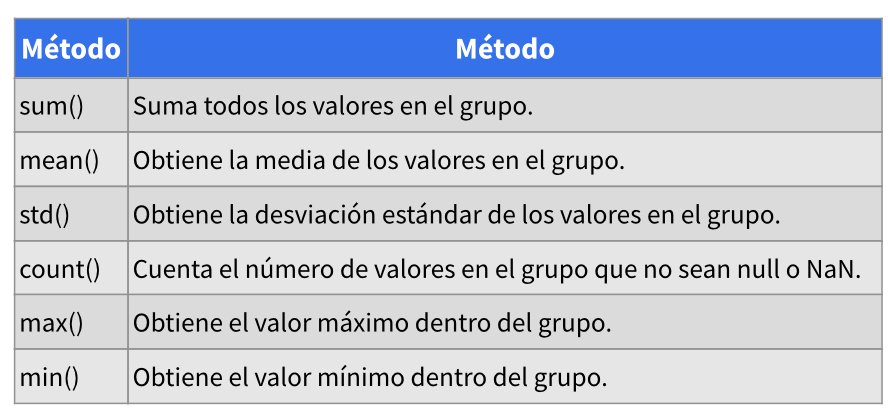

### Separación

In [91]:
data = {
    "unidades": [7, 13, 21, 11, 15, 11, 5, 8, 7, 16],
    "importe": [2268, 4212, 6804, 3564, 4860, 3564, 1620, 2592, 2268, 5184],
    "fecha": [
        "05/09/2020", "17/09/2020", "07/10/2020", "12/10/2020", 
        "03/11/2020", "26/11/2020", "28/09/2021", "30/09/2021", 
        "13/10/2021", "18/10/2021"
    ]
}

ventas = pd.DataFrame(data)
ventas.head()

,unidades,importe,fecha
0,7,2268,05/09/2020
1,13,4212,17/09/2020
2,21,6804,07/10/2020
3,11,3564,12/10/2020
4,15,4860,03/11/2020


In [92]:
type(ventas.fecha[0])

str

Suponiendo que todas las fechas estuvieran en un formato común y que este fuera *dd/mm/aa*, para extraer los 4 últimos dígitos, encontrar el año y colocarlo en una columna llamada, se puede usar:

str & split

In [97]:
ventas['año'] = ventas['fecha'].str[-4:].astype(int)
#O bien podemos dividir el strinmg con el metodo split
ventas['fecha'].str.split(pat='/').str[2].astype(int)

ventas.head()

,unidades,importe,fecha,año
0,7,2268,05/09/2020,2020
1,13,4212,17/09/2020,2020
2,21,6804,07/10/2020,2020
3,11,3564,12/10/2020,2020
4,15,4860,03/11/2020,2020


DatetimeIndex

In [99]:
pd.DatetimeIndex(ventas['fecha']).year

Index([2020, 2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021], dtype='int32', name='fecha')

In [100]:
pd.DatetimeIndex(ventas['fecha'], dayfirst=True).month

Index([9, 9, 10, 10, 11, 11, 9, 9, 10, 10], dtype='int32', name='fecha')

In [101]:
pd.DatetimeIndex(ventas['fecha'], dayfirst=True).day

Index([5, 17, 7, 12, 3, 26, 28, 30, 13, 18], dtype='int32', name='fecha')

Como los objetos *DatetimeIndex* son arreglos inmutables de objetos *Timestamp*, se puede asignar a objetos *Timestamp*, los cuales son una subclase de *datetime*. El constructor de la clase *DatetimeIndex*, como se mencionó anteriormente, puede recibir fechas como strings en diferentes formatos y realizar la conversión a objetos *Timestamp*. Por ejemplo, si se crea una serie con fechas en string con diferentes formatos:

In [102]:
fecha = pd.Series(['01/02/2021', '08-05-2017', '28 April 2020', '12-16-2019'])

Se puede obtener el año fácilmente creando un objeto DatetimeIndex:

In [103]:
pd.DatetimeIndex(fecha).year

Index([2021, 2017, 2020, 2019], dtype='int32')

## L5. Creación de Características por Transformación

### Escalamiento de características

#### Escalamiento con Pandas

In [116]:
data = {
    "metros_terreno": [200, 400, 120],
    "metros_construccion": [130, 312, 120],
    "cuartos": [3, 6, 3],
    "estacionamientos": [2, 3, 1],
    "precio": [1825000, 2850000, 1375000]
}

casas = pd.DataFrame(data)
casas

,metros_terreno,metros_construccion,cuartos,estacionamientos,precio
0,200,130,3,2,1825000
1,400,312,6,3,2850000
2,120,120,3,1,1375000


Mientras los metros de terreno y los metros de construcción están dados en cientos, el número de cuartos y el de lugares de estacionamiento están en unidades. No se diga el precio de la casa, que está en millones. La diferencia de escalas es muy grande.

En algunos procesos que usan los datos, como por ejemplo algunos métodos de machine learning, requieren que las escalas de las características sean comunes, es decir, similares, para garantizar un resultado adecuado en un tiempo adecuado. Si las escalas son muy diferentes, algunos de los métodos les cuesta mucho trabajo y tiempo extra el encontrar una solución adecuada. A este proceso se le conoce como <strong> *escalamiento* o *normalización*</strong>.

<strong> Escalamiento del máximo absoluto. </strong>

Se obtiene dividiendo cada dato 𝑥𝑖 entre el valor máximo de los valores absolutos de los datos en la columna 𝑥, lo cual dará un conjunto de valores entre -1 y 1: <br>

$$\frac{x_i}{max(|x|)}

In [109]:
casas['metros_terreno_norm'] = casas['metros_terreno']/max(abs(casas['metros_terreno']))

# O bien utilizando los metodos .abs() y .max()
casas['metros_terreno_norm2'] = casas['metros_terreno']/ casas['metros_terreno'].abs().max()
casas

,metros_terreno,metros_construccion,cuartos,estacionamientos,precio,metros_terreno_norm,metros_terreno_norm2
0,200,130,3,2,1825000,0.5,0.5
1,400,312,6,3,2850000,1.0,1.0
2,120,120,3,1,1375000,0.3,0.3


<strong> Escalamiento min-max </strong>

También llamado normalización, se obtiene restando el mínimo valor de la columna 𝑥 de cada dato 𝑥𝑖 y dividiendo el resultado entre la diferencia entre el dato máximo y el dato mínimo de la columna 𝑥, llamado rango de 𝑥. Este escalamiento da como resultado valores entre 0 y 1:

$$\frac{x_i-min(x)}{max(x)-min(x)}

In [111]:
casas['metros_terreno_norm3'] = (casas['metros_terreno'] - min(casas['metros_terreno']))/(max(casas['metros_terreno']) - min(casas['metros_terreno']))

# O bien con los métodos de pandas
casas['metros_terreno_norm4'] = (casas['metros_terreno'] - casas['metros_terreno'].min())/(casas['metros_terreno'].max() - casas['metros_terreno'].min())
casas

,metros_terreno,metros_construccion,cuartos,estacionamientos,precio,metros_terreno_norm,metros_terreno_norm2,metros_terreno_norm3,metros_terreno_norm4
0,200,130,3,2,1825000,0.5,0.5,0.285714,0.285714
1,400,312,6,3,2850000,1.0,1.0,1.000000,1.000000
2,120,120,3,1,1375000,0.3,0.3,0.000000,0.000000


<strong>Estandarización</strong>

Se logra restando la media de la columna x a cada uno de los datos xi y dividiendo el resultado entre la desviación estándar o de la misma columna, lo cual da resultados escalados tanto positivos como negativos:

$$\frac{x_i - \bar{x}}{\sigma{}}

In [112]:
casas['metros_terreno_norm5'] = (casas['metros_terreno'] - casas['metros_terreno'].mean())/casas['metros_terreno'].std()
casas

,metros_terreno,metros_construccion,cuartos,estacionamientos,precio,metros_terreno_norm,metros_terreno_norm2,metros_terreno_norm3,metros_terreno_norm4,metros_terreno_norm5
0,200,130,3,2,1825000,0.5,0.5,0.285714,0.285714,-0.27735
1,400,312,6,3,2850000,1.0,1.0,1.000000,1.000000,1.10940
2,120,120,3,1,1375000,0.3,0.3,0.000000,0.000000,-0.83205


### Escalamiento con sci-kit learn

Para obtener un escalamiento con *sci-kit learn* se debe importar el paquete llamado preprocessing. 

In [113]:
from sklearn import preprocessing

<strong> Escalamiento del máximo absoluto: MaxAbsSaler </strong>

In [124]:
escalador = preprocessing.MaxAbsScaler()
escalador.fit_transform(casas)

# O bien a una sola colmna del datframe
escalador.fit_transform(casas[['metros_terreno']])

array([[0.5],
       [1. ],
       [0.3]])

<strong> Escalamiento min-max: MinMaxScaler </strong>

In [125]:
escalador = preprocessing.MinMaxScaler()
escalador.fit_transform(casas)

# O bien a una sola colmna del datframe
escalador.fit_transform(casas[['metros_terreno']])

array([[0.28571429],
       [1.        ],
       [0.        ]])

<strong>Estandarización: StandardScaler</strong>

In [126]:
escalador = preprocessing.StandardScaler()
escalador.fit_transform(casas)

# O bien a una sola colmna del datframe
escalador.fit_transform(casas[['metros_terreno']])

array([[-0.33968311],
       [ 1.35873244],
       [-1.01904933]])

### Uso de funciones

#### Potencias

In [134]:
import pandas as pd

data = {
    'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'y': [19.8843, 19.2282, 20.0582, 27.3267, 33.1432, 39.7118, 55.5618, 63.5668, 83.7457, 97.2570, 112.5323]
}

# Create a DataFrame
puntos = pd.DataFrame(data)
puntos.head()

,x,y
0,0,19.8843
1,1,19.2282
2,2,20.0582
3,3,27.3267
4,4,33.1432


Si se grafica, es posible observar que la relación entre x y y no es lineal, parece más una parábola, es decir, una relación cuadrática

<Axes: xlabel='x'>

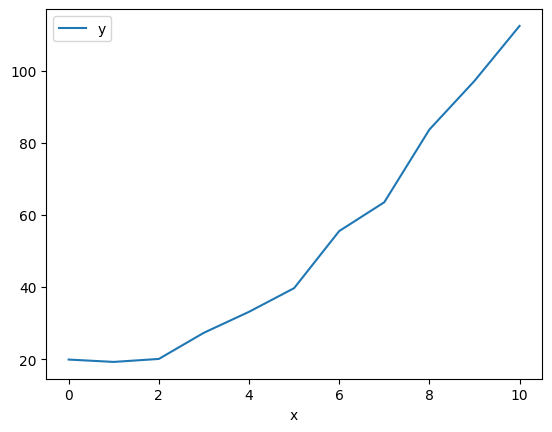

In [135]:
puntos.plot(x='x', y='y', kind='line')

Con esto se sabe que la relación podría ser de la siguiente forma: 
$$y = w_0 + {w_1}x + w_2 x^2

Donde, desde luego, faltaría conocer los valores exactos de las constantes. 

Para encontrar estos valores que logren aproximarse a los puntos lo mejor posible, se puede hacer una regresión, pero, para que la función pueda ser un polinomio de grado 2, es necesario crear una nueva variable a partir de la x con la que se cuenta. La nueva columna llamada *x**2* se formaría en Pandas con la instrucción:

In [136]:
puntos['x**2'] = puntos['x']**2
puntos

,x,y,x**2
0,0,19.8843,0
1,1,19.2282,1
2,2,20.0582,4
3,3,27.3267,9
4,4,33.1432,16
5,5,39.7118,25
6,6,55.5618,36
7,7,63.5668,49
8,8,83.7457,64
9,9,97.2570,81


#### Logaritmos

La librería numpy de Phyton tiene implementados los procedimientos para obtener tres logaritmos muy usados:
- Log2(): logaritmo base 2
- Log10(): logaritmo base 10
- Log(): logaritmo natural o base e = 2.71828…, que es un número irracional

In [139]:
import numpy as np

puntos['log10X'] = np.log10(puntos['x'])
puntos.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,x,y,x**2,log10X
0,0,19.8843,0,-inf
1,1,19.2282,1,0.000000
2,2,20.0582,4,0.301030
3,3,27.3267,9,0.477121
4,4,33.1432,16,0.602060


Generalmente, estos tres son suficientes para todas las aplicaciones, pero si te hace falta un logaritmo de otra base c, este se puede obtener fácilmente a partir de un logaritmo base b ya conocido, con la relación:

$$log_c(x) = \frac{log_b(x)}{log_b(b)}

#### One-Hot Encoding

La codificación One-Hot es una forma especial que ayuda a representar números enteros utilizado un vector binario. 

En este vector, todos sus elementos son 0, excepto uno que tiene un 1 y que representa la posición del número entero que se está codificando. <br>
Los números a codificar deben ser enteros consecutivos e inician a partir del 0, aunque se puede hacer un mapeo local para cambiarles el nombre. <br>
Sin embargo, para efectos de esta explicación se puede suponer que siempre son números enteros consecutivos iniciando en 0.

Si se cumplen estas condiciones, se van a requerir tantos bits en el vector como números se quieran representar.​

Por ejemplo:

Si se desean codificar los números {0, 1, 2, 3} en One-Hot cada número va a estar representado por un vector de 4 bits, donde el bit de más a la derecha es el primero y solo hay un 1, todos los demás son 0. La codificación para el 0 es 0001, lo que significa que el entero es el primero del conjunto, porque el bit que es 1 es el primero, esto es, el de más a la derecha. La codificación para el 1 es 0010, la del 2 es 0100 y la del 3 es 1000. 
​

In [141]:
data = {
    'precio': [10.25, 12.50, 21.50, 13.42, 10.20, 15.40],
    'color': ['rojo', 'verde', 'rojo', 'verde', 'amarillo', 'amarillo'],
    'id': [0, 1, 2, 0, 1, 0],
    'clase': ['manzana', 'pera', 'fresa', 'manzana', 'pera', 'manzana']
}

fruta = pd.DataFrame(data)
fruta

,precio,color,id,clase
0,10.25,rojo,0,manzana
1,12.50,verde,1,pera
2,21.50,rojo,2,fresa
3,13.42,verde,0,manzana
4,10.20,amarillo,1,pera
5,15.40,amarillo,0,manzana


#### Pandas

Pandas usa la función *get_dummies()*, que toma una variable categórica, y regresa tantas columnas como categorías tenga la columna. <br>
Los nombres brindados a las columnas son los de la categorías, colocándose en orden alfabético. Se asigna cero en todas ellas y solo un 1 en la que le corresponda.

In [143]:
fruta_OH = pd.get_dummies(fruta.clase, prefix = 'clase')
fruta_OH

,clase_fresa,clase_manzana,clase_pera
0,False,True,False
1,False,False,True
2,True,False,False
3,False,True,False
4,False,False,True
5,False,True,False


#### ski-kit learn: LabelBinarizer & OneHotEncodertoarray

In [145]:
from sklearn.preprocessing import LabelBinarizer

fruta_OH = LabelBinarizer().fit_transform(fruta.clase)
fruta_OH

array([[0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [151]:
from sklearn.preprocessing import OneHotEncoder

fruta_OH = OneHotEncoder().fit_transform(fruta[['clase']]).toarray()
fruta_OH

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

### Reducción de Dimensiones

Consiste en transformar todo el conjunto de datos de un espacio de alta-dimensión a un espacio de baja-dimensión, reduciendo el número de variables que lo representan, pero manteniendo las propiedades más importantes que describen el conjunto de datos original.

### Análisis de Componentes Principales (PACA's)

Existen varios métodos para hacer la reducción de dimensiones y uno de los más utilizados es la *selección de características o feature selection.* 

Sin embargo, el método más común para hacer la reducción de dimensiones en forma automática es el llamado *Análisis de Componentes Principales* o PCA por su nombre en inglés, *(Principal Components Analysis)*, el cual hace una proyección de los datos en un espacio con menos dimensiones.

In [152]:
data = {
    "x1":[1,8,9,6,2],
    "x2":[3,17,19,13,5]
}

puntos2D = pd.DataFrame(data=data)
puntos2D

,x1,x2
0,1,3
1,8,17
2,9,19
3,6,13
4,2,5


En realidad, la variable x2 es una función lineal de la variable x1:
$$x_2 = 2*x_1+1

Por lo anterior, no se está aportando ninguna información adicional al conjunto de datos.

In [153]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(puntos2D)
print(pca.components_)

[[ 0.4472136   0.89442719]
 [ 0.89442719 -0.4472136 ]]


Que da como resultado la impresión de los componentes en una matriz de 2 x 2 porque se le pidieron 2 componentes. <br>
Y la ecvaluación de los dos componentes obtenidos:

In [154]:
print(pca.explained_variance_)

[6.35000000e+01 1.36566344e-32]


Eso significa que, de la suma de esa lista, el primer componente explica 63.5 puntos de la varianza y el segundo 1.36 X 10-32, que es casi cero. <br>
Es decir, casi toda la información de este conjunto de datos puede ser obtenida con el primer componente y el segundo no contiene mucha información. <br>
A veces, es más comprensible conocer el porcentaje de varianza que está explicando cada componente. <br>
Este porcentaje se obtiene sumando todos los valores y dividiendo cada uno entre el total, pero esto se puede obtener al imprimir la variable *explained_variance_ratio_*

In [155]:
print(pca.explained_variance_ratio_)

[1.00000000e+00 2.15065108e-34]


Que significa que el primer componente explica casi el 100%, mientras que el segundo explica el 2.15 X 10-32%, esto es, prácticamente 0%. <br>
Finalmente, para formar las nuevas variables se deben aplicar estos componentes al conjunto original de datos y esto se hace con el método *.transform()*

In [157]:
puntos2DPCA = pca.transform(puntos2D)
puntos2DPCA

array([[-9.39148551e+00,  3.33066907e-16],
       [ 6.26099034e+00, -4.44089210e-16],
       [ 8.49705831e+00, -6.66133815e-16],
       [ 1.78885438e+00,  0.00000000e+00],
       [-7.15541753e+00,  2.22044605e-16]])

El número de las nuevas variables que se deben seleccionar son aquellas que expliquen un porcentaje adecuado de la varianza. <br>
Un valor común es 90% a 99%, pero hay casos en en los que se puede aceptar un porcentaje menor. 